# Plotting Challange

By: **Marcin Stopyra**  
Date: 28.11.2021

Plotting challenge assignment for Data Processing for Engineers and Scientist course at Universitat Stuttgart

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

## Reading Data

In [2]:
oilData = pd.read_csv( 'data/BZ-NMX_oil.csv')
gasData = pd.read_csv( 'data/NG-NMX_gas.csv')

In [3]:
oilData.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/21/2021,84.61,47081.0,85.88,86.12,83.36
1,10/20/2021,85.82,41281.0,85.10,85.89,83.63
2,10/19/2021,85.08,41887.0,84.11,85.40,83.71
3,10/18/2021,84.33,37176.0,85.05,86.03,83.96
4,10/15/2021,84.86,31221.0,84.20,85.10,84.17


In [4]:
oilData.describe()

,Close/Last,Volume,Open,High,Low
count,2557.000000,2507.000000,2557.000000,2557.000000,2557.000000
mean,73.211212,20430.749103,73.200309,73.994693,72.382867
std,26.239935,15478.819173,26.225886,26.195919,26.223259
min,19.330000,1.000000,19.130000,20.220000,18.320000
25%,51.900000,5413.500000,51.880000,52.620000,51.230000
50%,65.420000,21329.000000,65.540000,66.310000,64.670000
75%,104.380000,31615.000000,104.570000,105.210000,103.460000
max,126.220000,86039.000000,126.030000,128.230000,125.130000


## Data Preparation

In [5]:
datesOilStr = np.array( oilData['Date'])
datesGasStr = np.array( gasData['Date'])

pricesOil = np.array( oilData['Close/Last'])
pricesGas = np.array( gasData['Close/Last'])

print(type(datesOilStr[0]))
print(datesOilStr[0])

<class 'str'>
10/21/2021


In [7]:
datesOil = []
for date in datesOilStr:
    datesOil.append(datetime.datetime.strptime(date, '%m/%d/%Y'))

datesGas = []
for date in datesGasStr:
    datesGas.append(datetime.datetime.strptime(date, '%m/%d/%Y'))
    
print(f'data range for oil prices: {datesOil[0]} - {datesOil[-1]}')
print(f'data range for gas prices: {datesGas[0]} - {datesGas[-1]}')

data range for oil prices: 2021-10-21 00:00:00 - 2011-10-24 00:00:00
data range for gas prices: 2021-10-21 00:00:00 - 2011-10-24 00:00:00


## Price plots of gas and oil prices in last 10 years

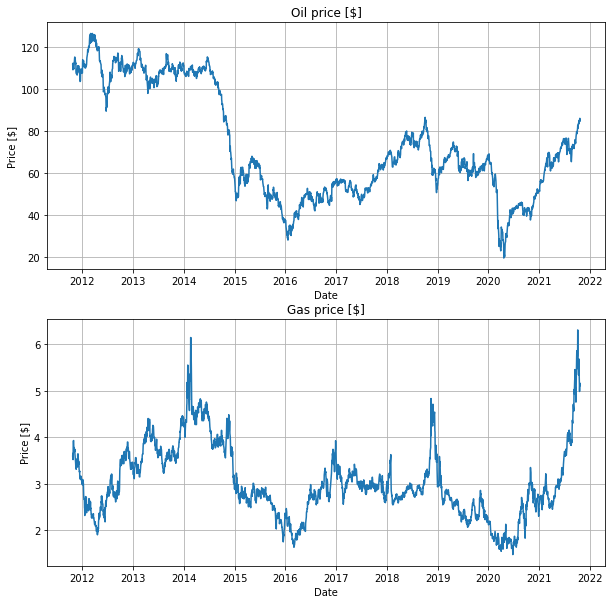

In [8]:
fig, (axOil, axGas) = plt.subplots(2, 1, figsize=(10,10))
axOil.set_title('Oil price [$]')
axOil.plot(datesOil, pricesOil )
axGas.set_title('Gas price [$]')
axGas.plot(datesGas, pricesGas)
axOil.grid()
axGas.grid()
axOil.set( xlabel='Date', ylabel='Price [$]')
axGas.set( xlabel='Date', ylabel='Price [$]')
plt.show()

## Gas and oil prices history during COVID-19 pandemics

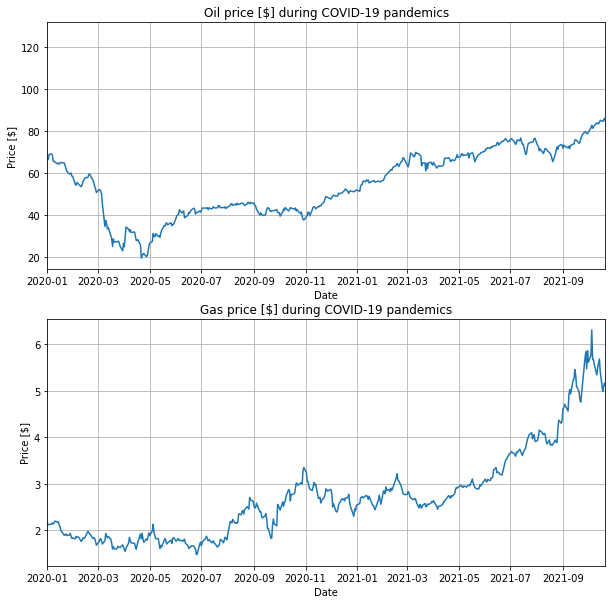

In [10]:
startDate = datetime.date(2020, 1, 1)

fig, (axOil, axGas) = plt.subplots(2, 1, figsize=(10,10))
axOil.set_title('Oil price [$] during COVID-19 pandemics')
axOil.plot(datesOil, pricesOil )
axGas.set_title('Gas price [$] during COVID-19 pandemics')
axGas.plot(datesGas, pricesGas)
axOil.grid()
axGas.grid()
axOil.set( xlabel='Date', ylabel='Price [$]')
axGas.set( xlabel='Date', ylabel='Price [$]')
axOil.set_xlim(left=startDate, right=datesOil[0])
axGas.set_xlim(left=startDate, right=datesGas[0])

plt.show()

## Comparison of global oil prices and diesel petrol in Poland

In recent months in my home country - Poland we can observe really fast growth of all petrol prices. As always in such situations people of Poland turned up to ruling politicians and demanded anserws on why does it happen and what will the government do to make situation better. Also as always in such situations, politicians in charge dropped the responsibility on somebody/something else, this time on rise of global oil prices. Therefore I decided to compare the global oil prices provided in the challenge with historical average prices of ON diesel price in Poland and see if what they say is true.

ON diesel prices in Poland source - [link](https://www.bankier.pl/gospodarka/wskazniki-makroekonomiczne/on-pol)

In [11]:
dieselPl = pd.read_csv('ONpricesPoland.csv', names=['date', 'ON price'], sep=';')
dieselPl

,date,ON price
0,2021-11-11 – 2021-11-18,6.03
1,2021-11-03 – 2021-11-10,6.00
2,2021-10-28 – 2021-11-04,6.00
3,2021-10-21 – 2021-10-28,5.98
4,2021-10-14 – 2021-10-21,5.94
...,...,...
862,2005-01-13 – 2005-01-20,3.37
863,2005-01-06 – 2005-01-13,3.38
864,2004-12-30 – 2005-01-06,3.40
865,2004-12-22 – 2004-12-29,3.41


Preparation od date column

In [12]:
datesONpl = []
for date in dieselPl['date']:
    dateTrimmed = date[:10]
    datesONpl.append(datetime.datetime.strptime(dateTrimmed, '%Y-%m-%d'))

pricesONpl = dieselPl['ON price']

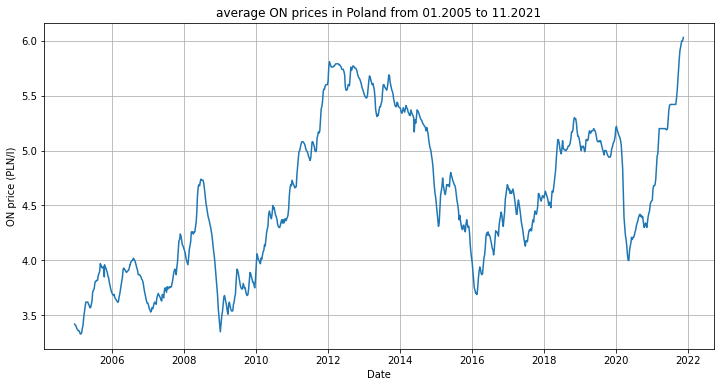

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(datesONpl, pricesONpl)
plt.grid()
plt.xlabel('Date')
plt.ylabel('ON price (PLN/l)')
plt.title('average ON prices in Poland from 01.2005 to 11.2021')
plt.show()

In [29]:
def comparePricesPlot(dates1, prices1, dates2, prices2, 
                      labels=["ON price in Poland [PLN/l]", "global Oil price [$]"],
                      title='Global oil prices and avg. ON petrol price in Poland',
                      xlim_years=None):
    
    # create figure and axis objects with subplots()
    fig,ax = plt.subplots(figsize=(10,8))
    # make a plot
    ax.plot(dates1, prices1, color="red")
    # set x-axis label
    ax.set_xlabel("date", fontsize=14)
    # set y-axis label
    ax.set_ylabel(labels[0], color="red")
    # set x limit to match the global oil prices
    ax.set_xlim(left=datetime.date(2011, 10, 1), right=datesONpl[0])
    plt.grid()
    # twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(dates2, prices2, color="blue")
    ax2.set_ylabel(labels[1], color="blue")
    plt.title(title)
    if xlim_years != None:
        plt.xlim([datetime.date(xlim_years[0], 1, 1), datetime.date(xlim_years[1], 1, 1)])
    plt.show()

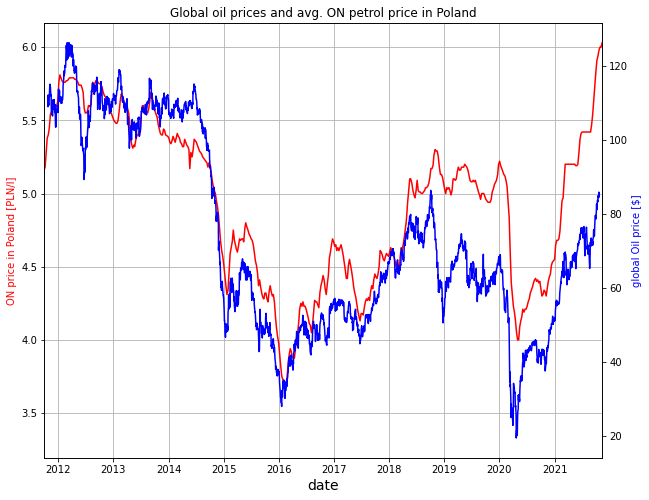

In [30]:
comparePricesPlot(datesONpl, pricesONpl, datesOil, pricesOil)

As we can see on the plot the ups and downs of ON price followed the ups and downs of global oil prices. However, we can also observe that the ON price in Poland now (around 6 PLN/l) is higher than in the middle of 2012 (around 5.75 PLN/l). The coresponding global oil prices in mentioned periods are respectively: 2021 - approx. 85 USD, 2012 - more than 120 USD. We can see that although the global oil price in 2021 is around 30% cheaper than it was in 2012, the price of ON diesel petrol in Poland is higher now than in 2012. Therefore we can clearly see that the really fast growth of the price of the diesel petrol in year 2021 is is much faster than it should be, if it was caused only by rising global oil price.


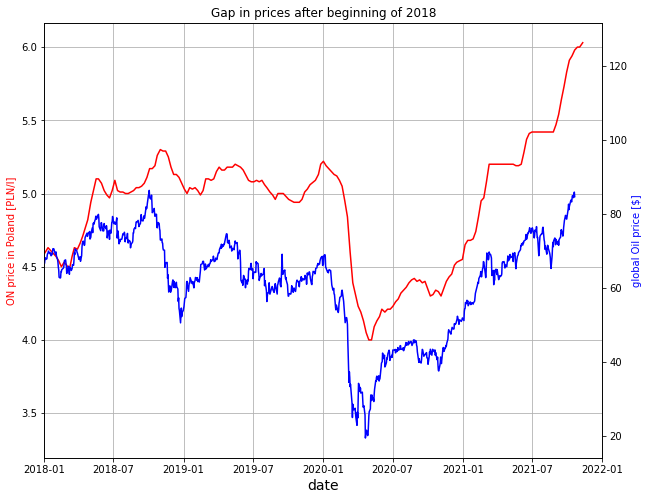

In [32]:
comparePricesPlot(datesONpl, pricesONpl, datesOil, pricesOil, title='Gap in prices after beginning of 2018', xlim_years=[2018, 2022])